In [1]:
import nltk
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from string import punctuation
import pprint as pp

### Word and sentence tokenizer

Word tokenizer breaks down the entire text strings into tokens and put them into a list.
Use pos_tag to break a block of text down into its parts of speech 

In [3]:
from nltk.tokenize import word_tokenize, sent_tokenize
w = word_tokenize('The novel corona virus has infected more than 108,000 people around the world')
print(w)

# break down text into parts of speech
print(nltk.pos_tag(w))
print(nltk.pos_tag(w, tagset = 'universal'))


['The', 'novel', 'corona', 'virus', 'has', 'infected', 'more', 'than', '108,000', 'people', 'around', 'the', 'world']
[('The', 'DT'), ('novel', 'JJ'), ('corona', 'NN'), ('virus', 'NN'), ('has', 'VBZ'), ('infected', 'VBN'), ('more', 'JJR'), ('than', 'IN'), ('108,000', 'CD'), ('people', 'NNS'), ('around', 'IN'), ('the', 'DT'), ('world', 'NN')]
[('The', 'DET'), ('novel', 'ADJ'), ('corona', 'NOUN'), ('virus', 'NOUN'), ('has', 'VERB'), ('infected', 'VERB'), ('more', 'ADJ'), ('than', 'ADP'), ('108,000', 'NUM'), ('people', 'NOUN'), ('around', 'ADP'), ('the', 'DET'), ('world', 'NOUN')]


Sentence tokenizer breaks text down into a list of sentences

In [4]:
s1 = 'Coronavirus: On the front line in Wuhan. COVID-19 is the name of the virus' # 2 sentences
print(sent_tokenize(s1))
s2 = 'Coronavirus. On the front line in Wuhan. COVID-19 is the name of the virus' # 3 sentences
print(sent_tokenize(s2))

['Coronavirus: On the front line in Wuhan.', 'COVID-19 is the name of the virus']
['Coronavirus.', 'On the front line in Wuhan.', 'COVID-19 is the name of the virus']


### Corpora in other languages

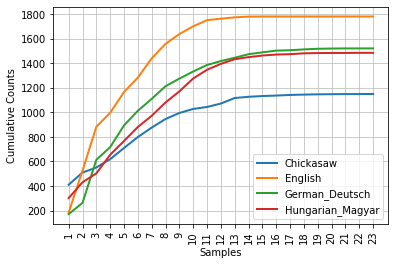

In [19]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch', 'Hungarian_Magyar']
cfd = nltk.ConditionalFreqDist((lang, len(word))
                               for lang in languages
                               for word in udhr.words(lang + '-Latin1'))
cfd.plot(cumulative=True)


### Word2Vec

Used to convert a document to a vector representation. Similar words will have similar values - floating points values.                                                                                                       

In [20]:
from gensim.models import Word2Vec
caesar_vec = Word2Vec(gutenberg.sents('shakespeare-caesar.txt'))
macbeth_vec = Word2Vec(gutenberg.sents('shakespeare-macbeth.txt'))

print(caesar_vec.wv.most_similar('pray', topn=10)) # top 10 similar words 'pray' in caesar text
print(macbeth_vec.wv.most_similar('pray', topn=10)) # top 10 similar words 'pray' in macbeth text

[('sicke', 0.9857463240623474), ('seeme', 0.9856500029563904), ('long', 0.9856350421905518), ('themselues', 0.9854944944381714), ('Titinius', 0.9854522943496704), ('name', 0.9854482412338257), ('away', 0.9853688478469849), ('Lucius', 0.9853524565696716), ('against', 0.9853373765945435), ('hand', 0.9853315353393555)]
[('He', 0.998792290687561), ('did', 0.9987673759460449), ('thy', 0.9987616539001465), ('with', 0.998755931854248), ('That', 0.998755693435669), ('see', 0.998753547668457), ('more', 0.998750627040863), (':', 0.9987480640411377), ('shall', 0.9987457990646362), ('one', 0.9987444877624512)]


In [21]:
bible = gutenberg.sents('bible-kjv.txt')
stopw = stopwords.words('english')
biblew = [[w.lower() for w in s if w not in punctuation and w not in stopw] for s in bible]
print(len(biblew))

bible_vec = Word2Vec(biblew)
pp.pprint(bible_vec.wv.most_similar('satan', topn=10))
pp.pprint(bible_vec.wv.most_similar('devil', topn=10))

30103
[('haman', 0.9747307300567627),
 ('message', 0.9684863090515137),
 ('necessary', 0.9654820561408997),
 ('sport', 0.9641214609146118),
 ('esther', 0.963122546672821),
 ('commune', 0.9619585275650024),
 ('lad', 0.9603400230407715),
 ('doeg', 0.9600770473480225),
 ('enquired', 0.9590467214584351),
 ('dumb', 0.9575910568237305)]
[('scorn', 0.9889707565307617),
 ('void', 0.9883360862731934),
 ('hasty', 0.9882153272628784),
 ('abundant', 0.9870535135269165),
 ('error', 0.9863446950912476),
 ('thigh', 0.9861733317375183),
 ('overthrow', 0.9849646091461182),
 ('scorpions', 0.9848448634147644),
 ('necks', 0.984715461730957),
 ('hard', 0.9839115142822266)]


### Stemming and Lemmatization

Stemming: Normalization process in which sentences or words are reduced to their base forms by getting rid of the word endings. Results you get may or may not be a actual word.

In [22]:
from nltk.stem import PorterStemmer
st = PorterStemmer()

words = ['are', 'signs', 'infection', 'coronavirus', 'corona', 'symptoms', 
         'shortness', 'short', 'breaths', 'breathing', 'played', 'plays']
for word in words:
    print(word, st.stem(word)) # prints out the word and the stem version of the word

are are
signs sign
infection infect
coronavirus coronaviru
corona corona
symptoms symptom
shortness short
short short
breaths breath
breathing breath
played play
plays play


Lemmatizer returns the root word back

In [23]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
words = ['are', 'signs', 'infection', 'coronavirus', 'corona', 'symptoms',
      'shortness', 'short', 'breaths', 'breathing', 'played', 'plays']

for word in words:
    print(word, lm.lemmatize(word)) # prints out the word and the lem version of the word

are are
signs sign
infection infection
coronavirus coronavirus
corona corona
symptoms symptom
shortness shortness
short short
breaths breath
breathing breathing
played played
plays play
